<a href="https://colab.research.google.com/github/PierfrancescoElia/AICyberLabs/blob/main/Lab01/lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

random_state = 42

dataset_url = 'https://raw.githubusercontent.com/PierfrancescoElia/AICyberLabs/refs/heads/main/Lab01/dataset_lab_1.csv'
import pandas as pd
df = pd.read_csv(dataset_url)

In [3]:
df

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


20 columns of DoS Hulk are empty, we will drop them


In [4]:
print(df[df.isna().any(axis=1)].count())
print(df[df['Label'] == 'DoS Hulk'].count())
df = df.dropna()
display(df)

Flow Duration             20
Flow IAT Mean             20
Fwd PSH Flags             20
Bwd Packet Length Mean    20
Bwd Packet Length Max     20
Flow Bytes/s               0
Down/Up Ratio             20
SYN Flag Count            20
Fwd Packet Length Mean    20
Fwd IAT Std               20
Packet Length Mean        20
Fwd Packet Length Max     20
Subflow Fwd Packets       20
Flow Packets/s            20
Total Fwd Packets         20
Destination Port          20
Label                     20
dtype: int64
Flow Duration             5000
Flow IAT Mean             5000
Fwd PSH Flags             5000
Bwd Packet Length Mean    5000
Bwd Packet Length Max     5000
Flow Bytes/s              4982
Down/Up Ratio             5000
SYN Flag Count            5000
Fwd Packet Length Mean    5000
Fwd IAT Std               5000
Packet Length Mean        5000
Fwd Packet Length Max     5000
Subflow Fwd Packets       5000
Flow Packets/s            5000
Total Fwd Packets         5000
Destination Port          500

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


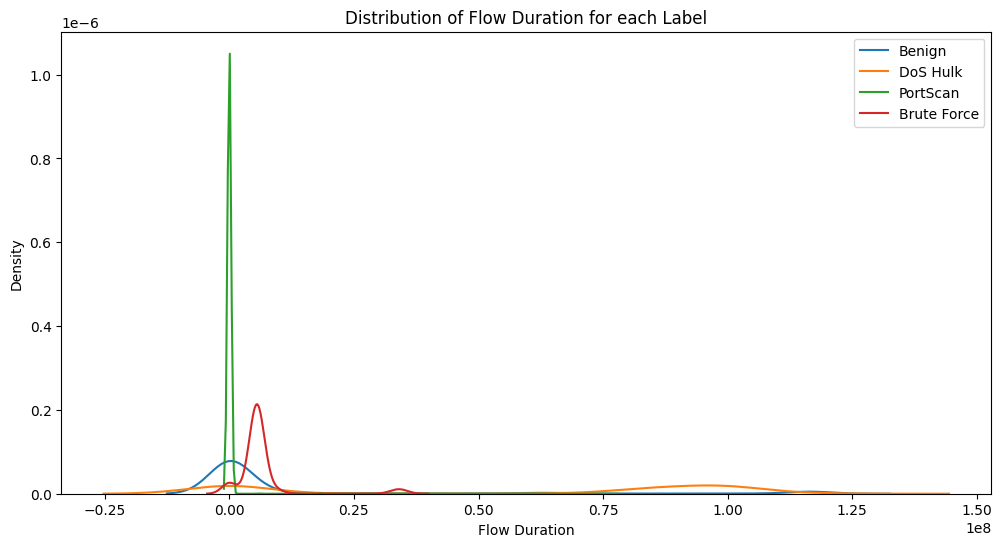

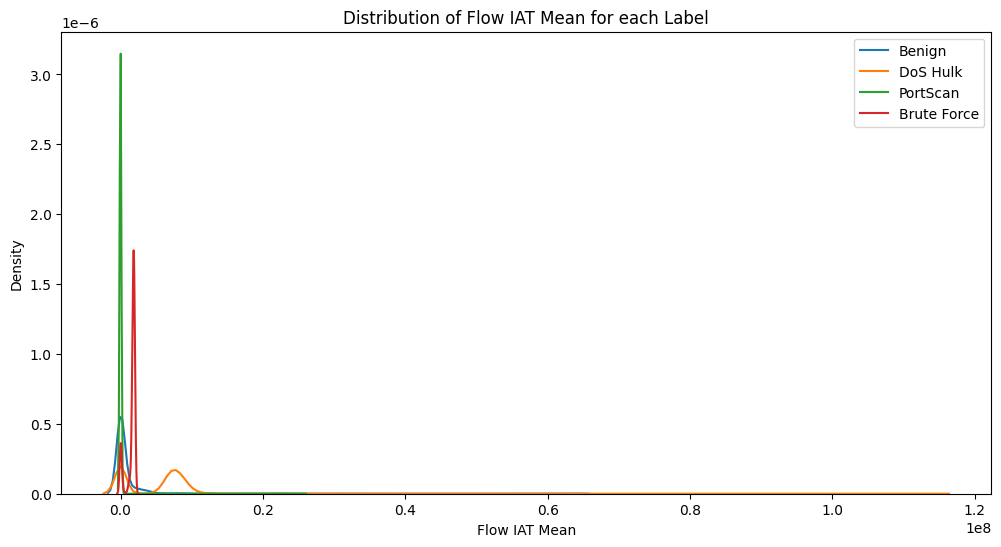

<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)
<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)
<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)


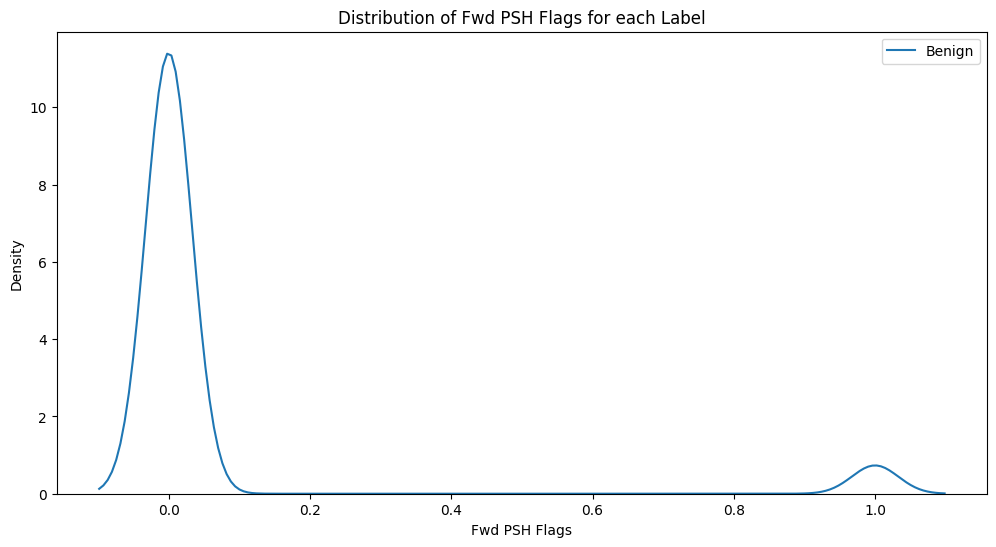

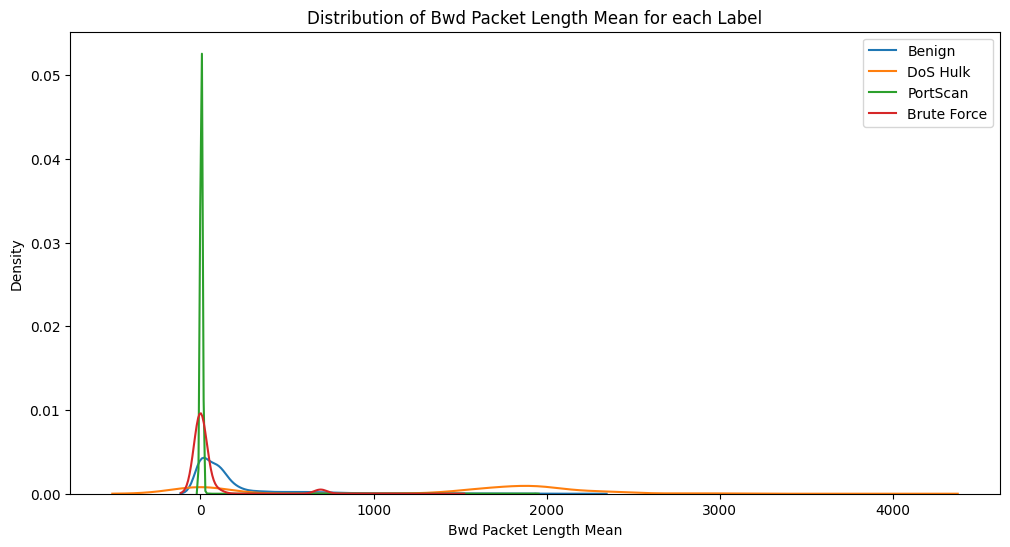

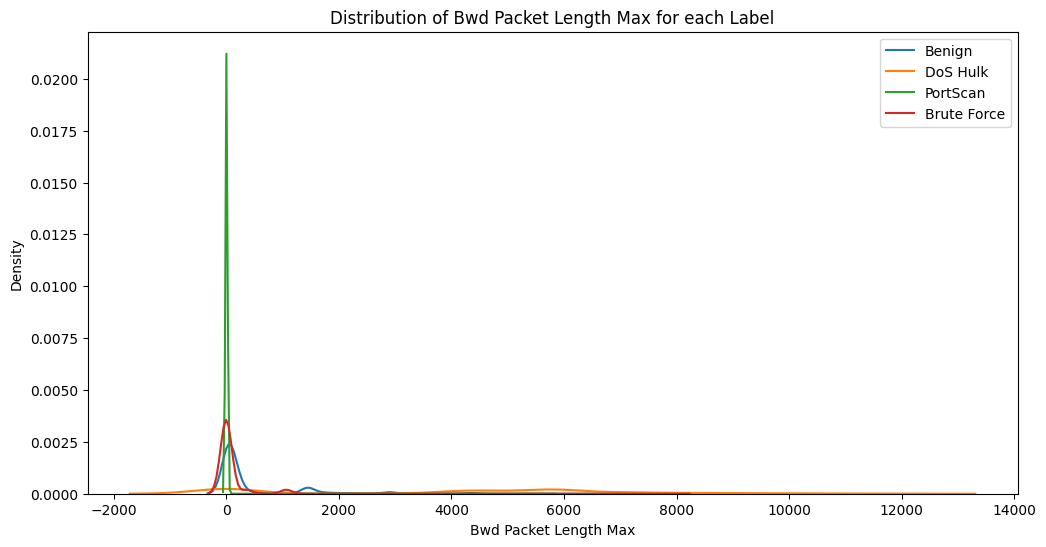

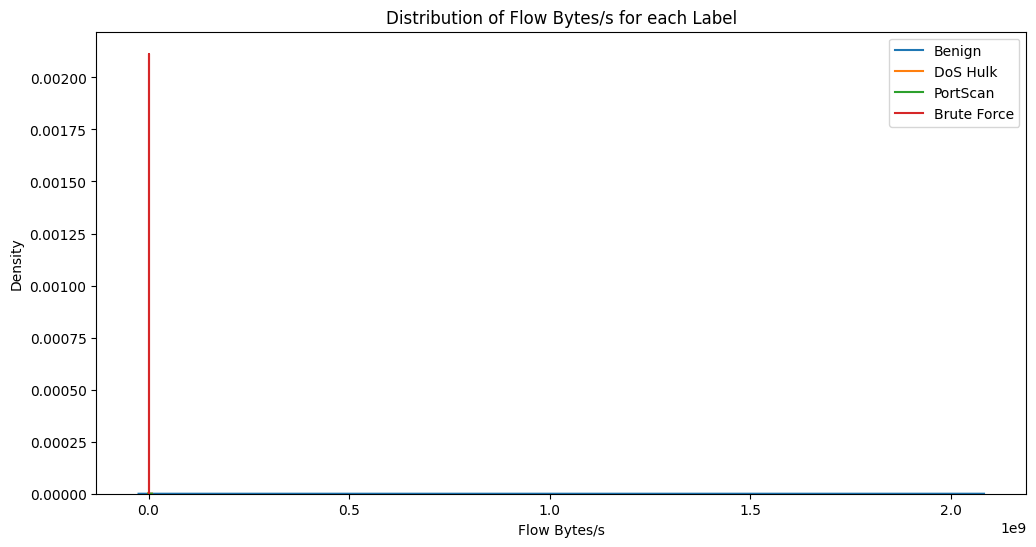

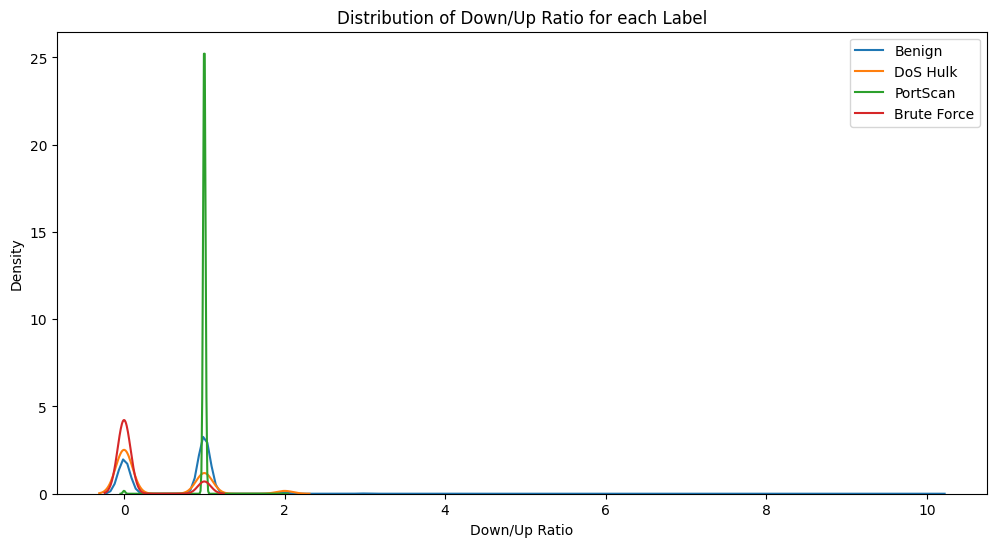

<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)
<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)
<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)


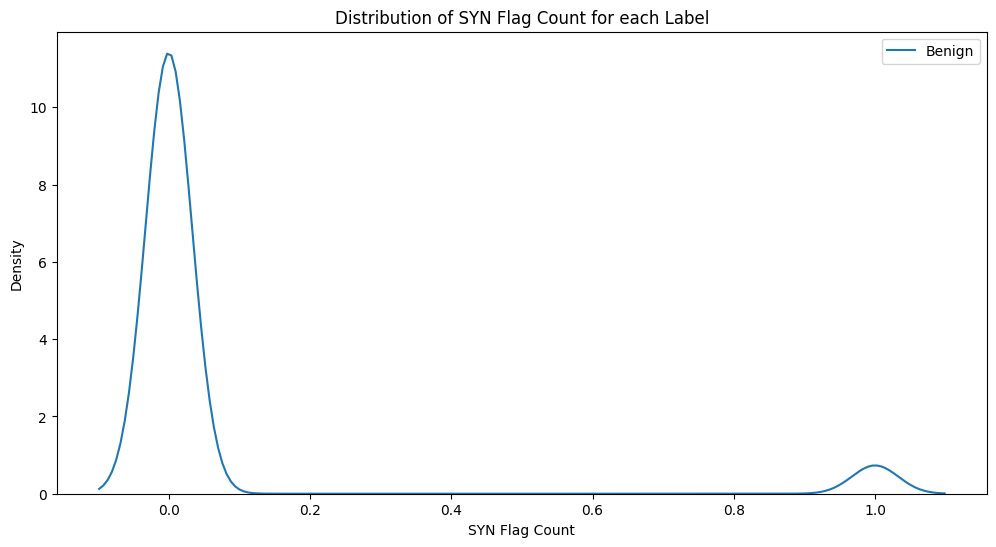

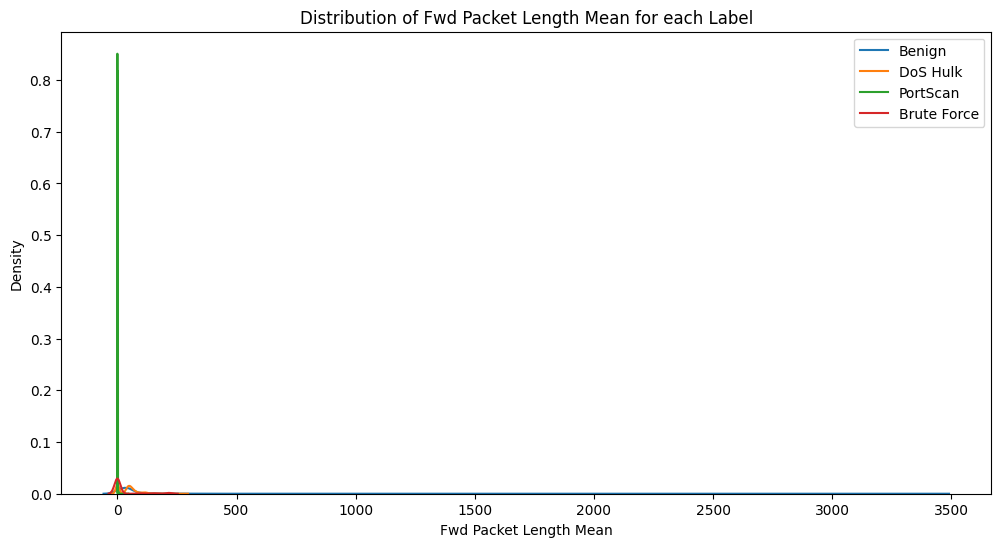

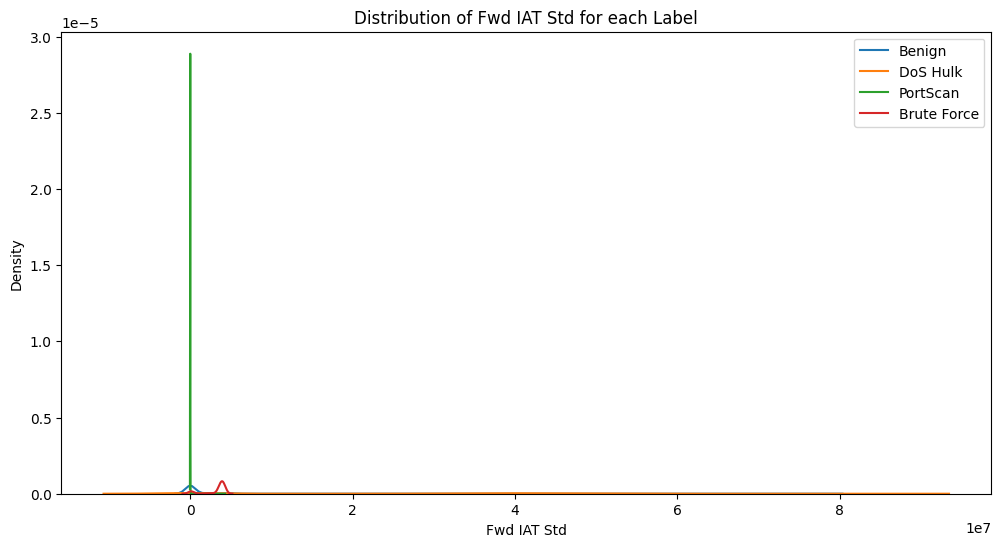

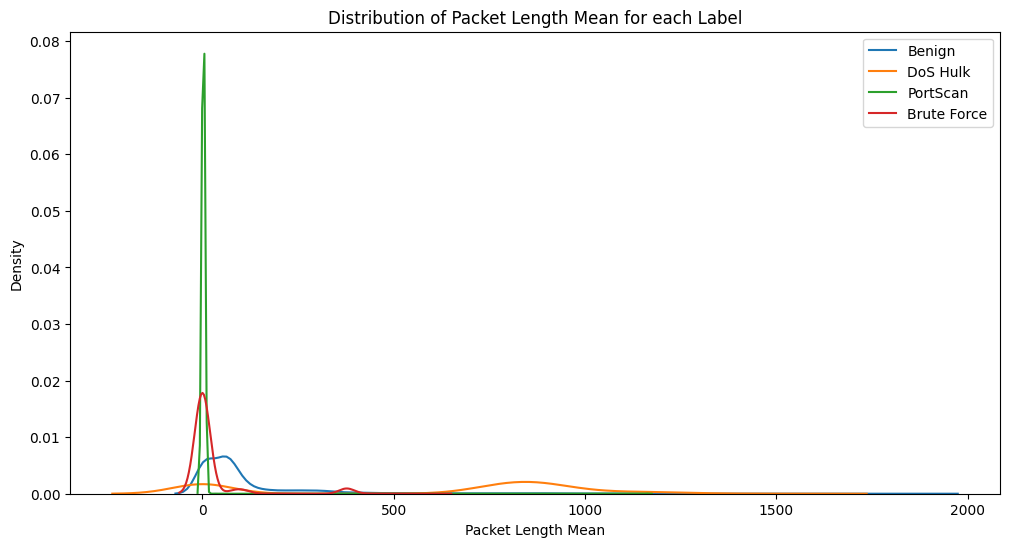

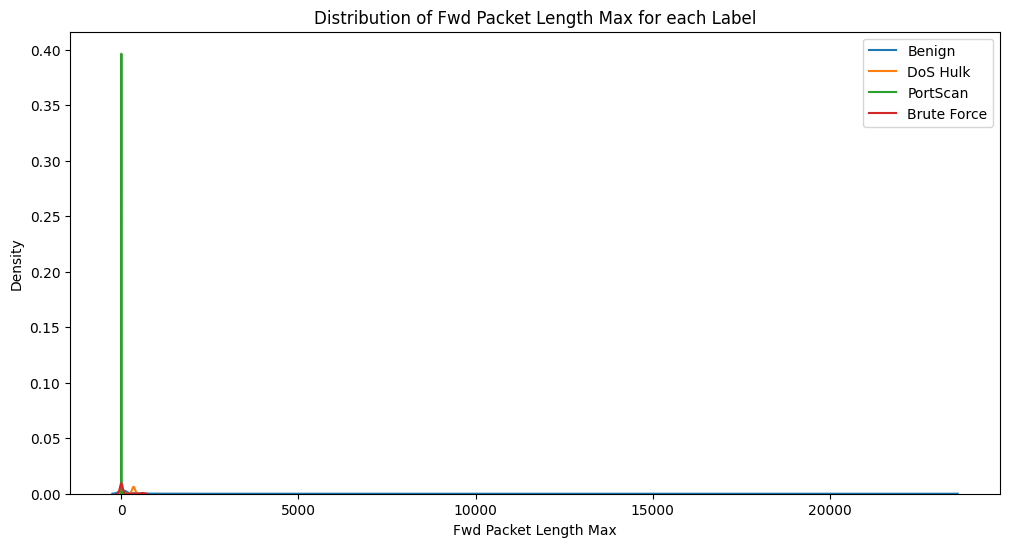

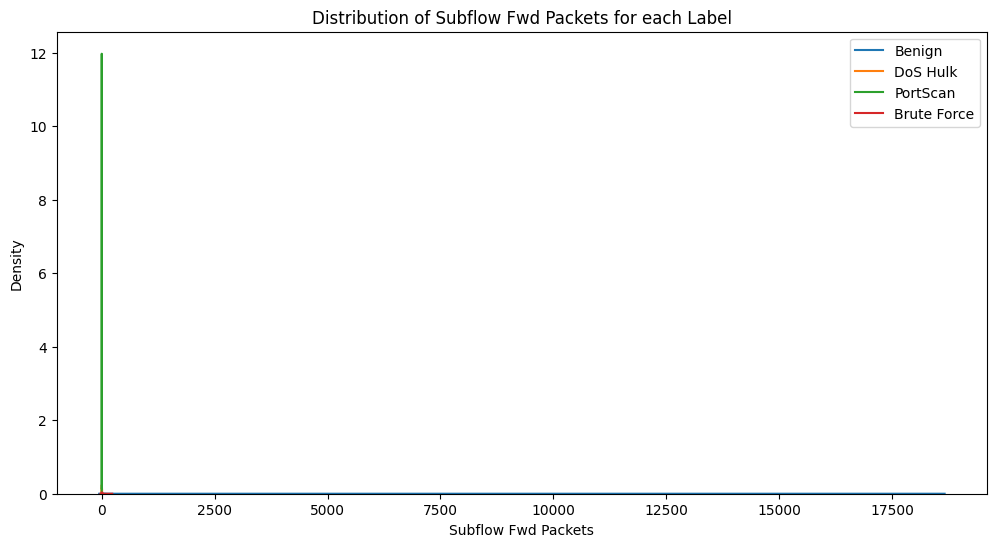

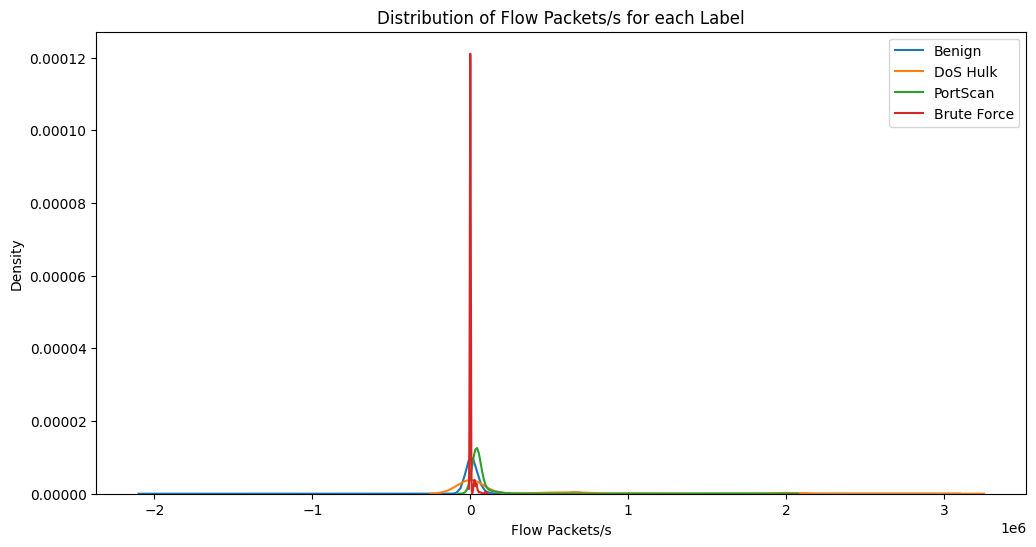

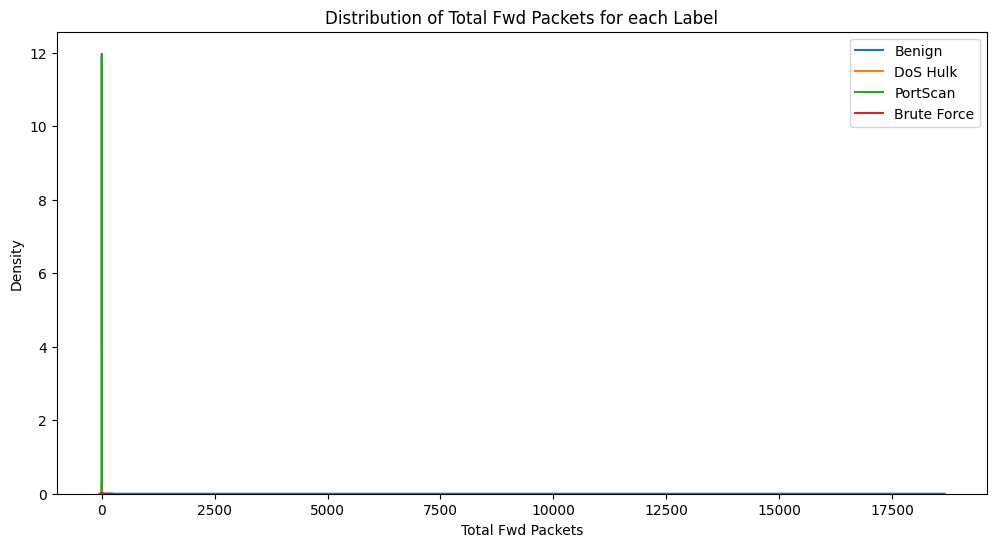

<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)
<ipython-input-5-ee7927134cd8>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)


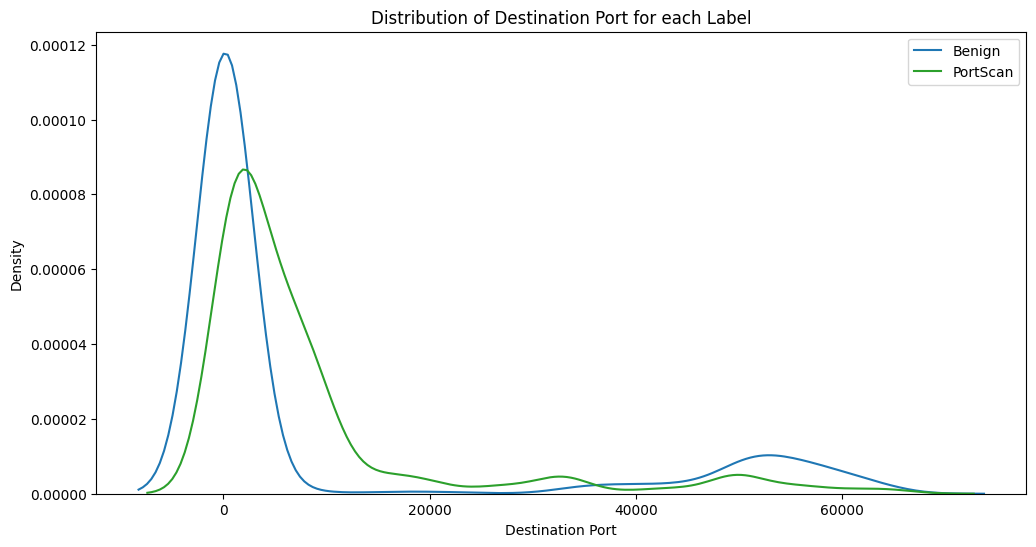

In [5]:
# prompt: i want to see distribution of features for each Label value, stack all the lines in one graph for each feature


for column in df.columns[:-1]:  # Exclude the 'Label' column
  plt.figure(figsize=(12, 6))
  for label_value in df['Label'].unique():
    sns.kdeplot(df[df['Label'] == label_value][column], label=label_value)
  plt.title(f'Distribution of {column} for each Label')
  plt.xlabel(column)
  plt.ylabel('Density')
  plt.legend()
  plt.show()


We saw that for the 'SYN Flag Count' and 'Fwd PSH Flags' features, when it is to '1', the row is always Labeled as Bening, we think that think that there are not features that are usefull to classify attacks. We will drop them

In [6]:
df = df.dropna()
df.drop('SYN Flag Count', axis=1, inplace=True)
df.drop('Fwd PSH Flags', axis=1, inplace=True)

In [7]:
df

,Flow Duration,Flow IAT Mean,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,749.4,1448,12743.263,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0.0,0,0.000,1,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0.0,0,84507.040,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,52.0,52,921465.940,1,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0.0,0,3000000.000,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0.0,0,0.000,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0.0,0,0.000,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0.0,0,0.000,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0.0,0,0.000,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


Testo di prova - let's see if Git works.

In [8]:
train_data, temp_data = train_test_split(df, test_size=0.4, random_state=random_state)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=random_state)

print(f"Training set: {train_data.shape}")
print(f"Validation set: {val_data.shape}")
print(f"Test set: {test_data.shape}")

Training set: (18892, 15)
Validation set: (6297, 15)
Test set: (6298, 15)


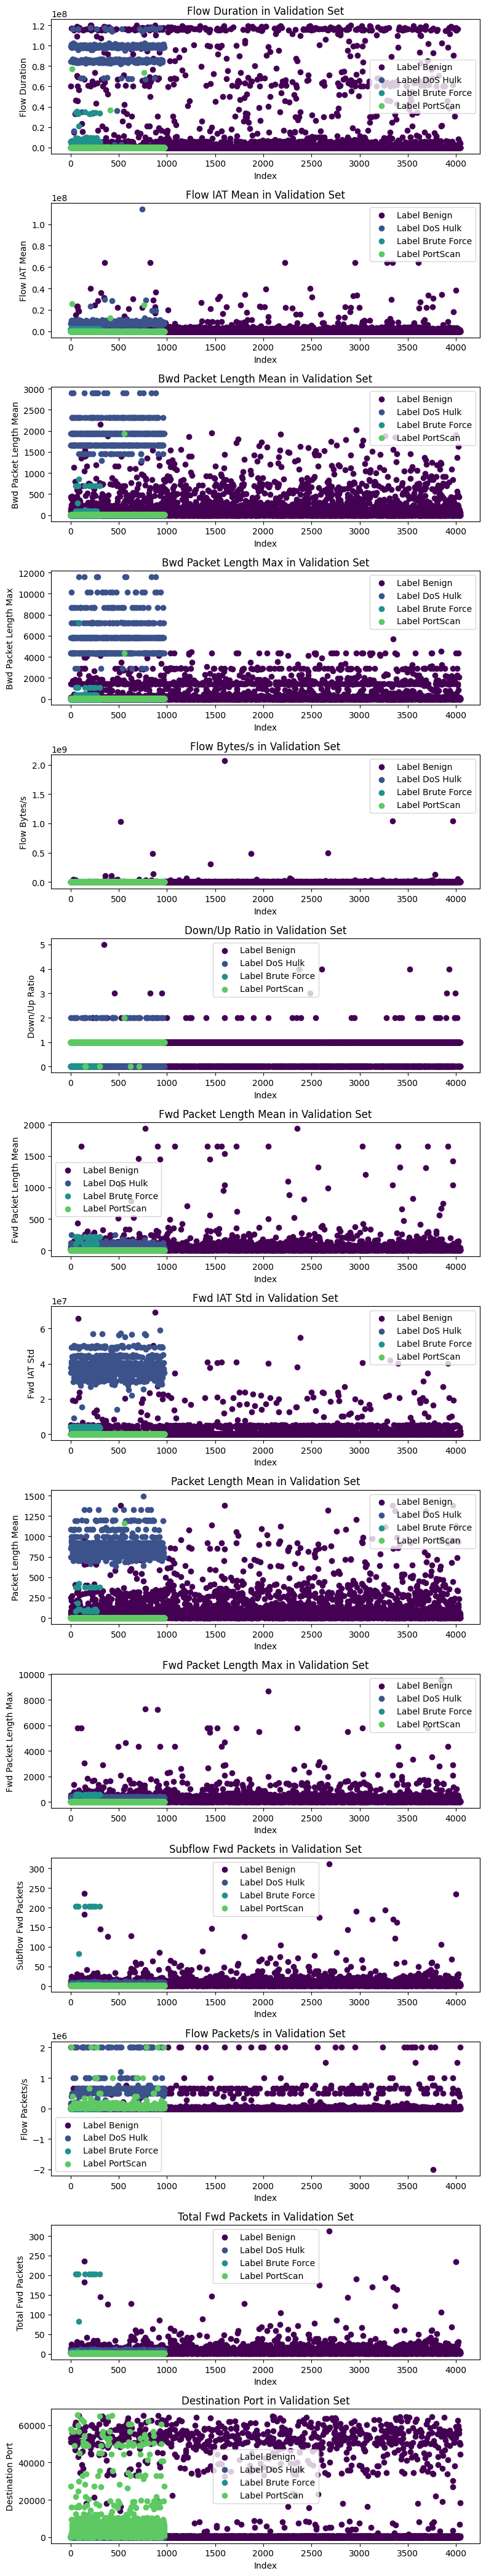

In [9]:
X_val = val_data.drop('Label', axis=1)
y_val = val_data['Label']

X_test = test_data.drop('Label', axis=1)
y_test = test_data['Label']

n_cols = len(X_val.columns)

unique_labels = y_val.unique()
label_colors = {label: plt.cm.viridis(i / len(unique_labels)) for i, label in enumerate(unique_labels)}

# Create a figure with subplots for the validation set
fig, axs = plt.subplots(n_cols, 1, figsize=(8, n_cols * 3))
for i, col in enumerate(X_val.columns):
    for label in unique_labels:
        # Filter data by the current label
        label_data = X_val[y_val == label]
        axs[i].scatter(
            range(len(label_data[col])),
            label_data[col],
            label=f'Label {label}',
            color=label_colors[label],
        )
    axs[i].set_title(f'{col} in Validation Set')
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(col)
    axs[i].legend()  # Add legend to each subplot

plt.tight_layout()
plt.show()